In [21]:
import os
import pandas as pd
from circum import xy_values
import cv2 as cv
import matplotlib.pyplot as plt
import ast
import numpy as np
from pathlib import Path
import shutil
import random

In [22]:
os.chdir("/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/\
Masters by Research/Mask RCNN/Annotation projects/ACFR/mangoes")

In [23]:
def center_radius(x,y,dx,dy):
    cx = x+(0.5*dx)
    cy = y+(0.5*dy)
    radius = 0.5*(max(dx,dy))
    return cx,cy, radius

In [24]:
os.listdir(os.getcwd())

['train_images',
 'train_final.csv',
 'train_csv',
 'test_csv',
 'test_final.csv',
 'test_images']

In [25]:
images_path = os.path.join(os.getcwd(),"test_images")
annotations_path = os.path.join(os.getcwd(),"test_csv")

## ONE

In [26]:
['filename', 'file_size', 'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']

['filename',
 'file_size',
 'file_attributes',
 'region_count',
 'region_id',
 'region_shape_attributes',
 'region_attributes']

In [27]:
annotations_list = os.listdir(annotations_path)
a = annotations_list[0]
a
df_a = pd.read_csv(os.path.join(annotations_path,a))
df_a
image_name =  a.replace(".csv",".png")
img = cv.imread(os.path.join(images_path,image_name))
for row in range(len(df_a)):
    cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
             df_a.at[row,"dx"],df_a.at[row,"dy"])
    df_a.at[row,"cx"] = cx
    df_a.at[row,"cy"] = cy
    df_a.at[row,"radius"] = radius_
    df_a.at[row,"filename"] = image_name
    df_a.at[row,"file_attributes"] = "{}"
    df_a.at[row,"region_count"] = len(df_a)
    df_a.at[row,'region_id'] = row
    df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
    t = {"name":"polygon","all_points_x":None,"all_points_y":None}
    x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
    t['all_points_x']  = x
    t['all_points_y'] = y
    df_a.at[row,'region_shape_attributes'] = str(t)
    df_a.at[row,"region_attributes"] = "{}"

In [28]:
df_a["file_size"] = df_a["file_size"].astype("int64")
df_a["region_count"] = df_a["region_count"].astype("int64")
df_a['region_id'] = df_a['region_id'].astype("int64")
df_a

,#item,x,y,dx,dy,label,cx,cy,radius,filename,file_attributes,region_count,region_id,file_size,region_shape_attributes,region_attributes
0,0,72.631579,155.789474,30.717490,29.640806,1,87.990324,170.609877,15.358745,20151124T025049.132800_i1923j1012.png,{},11,0,1056928,"{'name': 'polygon', 'all_points_x': [103, 103,...",{}
1,1,154.210526,174.736842,27.645741,26.676725,1,168.033397,188.075205,13.822871,20151124T025049.132800_i1923j1012.png,{},11,1,1056928,"{'name': 'polygon', 'all_points_x': [181, 181,...",{}
2,2,275.789474,87.368421,27.645741,32.278838,1,289.612344,103.507840,16.139419,20151124T025049.132800_i1923j1012.png,{},11,2,1056928,"{'name': 'polygon', 'all_points_x': [305, 305,...",{}
3,3,440.000000,17.894737,24.881167,29.050954,1,452.440584,32.420214,14.525477,20151124T025049.132800_i1923j1012.png,{},11,3,1056928,"{'name': 'polygon', 'all_points_x': [466, 466,...",{}
4,4,458.947368,16.842105,24.881167,29.050954,1,471.387952,31.367582,14.525477,20151124T025049.132800_i1923j1012.png,{},11,4,1056928,"{'name': 'polygon', 'all_points_x': [485, 485,...",{}
5,5,398.947368,264.210526,30.106212,35.151654,1,414.000474,281.786354,17.575827,20151124T025049.132800_i1923j1012.png,{},11,5,1056928,"{'name': 'polygon', 'all_points_x': [431, 431,...",{}
6,6,423.684211,245.263158,24.142171,28.188112,1,435.755296,259.357214,14.094056,20151124T025049.132800_i1923j1012.png,{},11,6,1056928,"{'name': 'polygon', 'all_points_x': [449, 449,...",{}
7,7,318.947368,405.789474,23.900750,30.696854,1,330.897743,421.137900,15.348427,20151124T025049.132800_i1923j1012.png,{},11,7,1056928,"{'name': 'polygon', 'all_points_x': [346, 346,...",{}
8,8,135.789474,371.052632,26.290825,30.696854,1,148.934886,386.401058,15.348427,20151124T025049.132800_i1923j1012.png,{},11,8,1056928,"{'name': 'polygon', 'all_points_x': [164, 164,...",{}
9,9,103.684211,227.368421,21.295568,24.864451,1,114.331995,239.800647,12.432226,20151124T025049.132800_i1923j1012.png,{},11,9,1056928,"{'name': 'polygon', 'all_points_x': [126, 126,...",{}


In [29]:
list(df_a.columns)

['#item',
 'x',
 'y',
 'dx',
 'dy',
 'label',
 'cx',
 'cy',
 'radius',
 'filename',
 'file_attributes',
 'region_count',
 'region_id',
 'file_size',
 'region_shape_attributes',
 'region_attributes']

## TEST

In [30]:
a = df_a.loc[0,'region_shape_attributes']
a = ast.literal_eval(a)
x = a["all_points_x"]
y = a["all_points_y"]

In [31]:
pts = []
for i,j in zip(x,y):
    pts.append([i,j])
pts = np.array(pts)
img = cv.polylines(img,[np.int32(pts)],isClosed=True,color=(255,0,0),thickness=10)

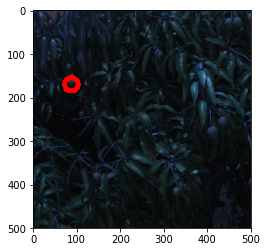

In [32]:
plt.imshow(img)

In [33]:
#OK OK OK OK

## LOOP THROUGH ALL

In [34]:
annotations_list = os.listdir(annotations_path)

In [35]:
metadf = pd.DataFrame(columns=['#item',
 'x',
 'y',
 'dx',
 'dy',
 'label',
 'cx',
 'cy',
 'radius',
 'filename',
 'file_attributes',
 'region_count',
 'region_id',
 'file_size',
 'region_shape_attributes',
 'region_attributes'])

In [36]:
for index,annotation in enumerate(annotations_list):
    df_a = pd.read_csv(os.path.join(annotations_path,annotation))
    df_a
    image_name =  annotation.replace(".csv",".png")
    img = cv.imread(os.path.join(images_path,image_name))
    for row in range(len(df_a)):
        cx,cy, radius_ =center_radius(df_a.at[row,"x"],df_a.at[row,"y"],\
                 df_a.at[row,"dx"],df_a.at[row,"dy"])
        df_a.at[row,"cx"] = cx
        df_a.at[row,"cy"] = cy
        df_a.at[row,"radius"] = radius_
        df_a.at[row,"filename"] = image_name
        df_a.at[row,"file_attributes"] = "{}"
        df_a.at[row,"region_count"] = len(df_a)
        df_a.at[row,'region_id'] = row
        df_a.at[row,"file_size"] = Path(os.path.join(images_path,image_name)).stat().st_size
        t = {"name":"polygon","all_points_x":None,"all_points_y":None}
        x,y = xy_values(df_a.at[row,"cx"],df_a.at[row,"cy"],df_a.at[row,"radius"],img.shape[0],img.shape[1])
        t['all_points_x']  = x
        t['all_points_y'] = y
        df_a.at[row,'region_shape_attributes'] = str(t)
        df_a.at[row,"region_attributes"] = "{}"
    metadf = pd.concat([metadf, df_a], ignore_index=True)


/home/kiprono/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [37]:
metadf["file_size"] = metadf["file_size"].astype("int64")
metadf["region_count"] = metadf["region_count"].astype("int64")
metadf['region_id'] = metadf['region_id'].astype("int64")
metadf

,#item,cx,cy,dx,dy,file_attributes,file_size,filename,label,radius,region_attributes,region_count,region_id,region_shape_attributes,x,y
0,0,87.990324,170.609877,30.717490,29.640806,{},1056928,20151124T025049.132800_i1923j1012.png,1,15.358745,{},11,0,"{'name': 'polygon', 'all_points_x': [103, 103,...",72.631579,155.789474
1,1,168.033397,188.075205,27.645741,26.676725,{},1056928,20151124T025049.132800_i1923j1012.png,1,13.822871,{},11,1,"{'name': 'polygon', 'all_points_x': [181, 181,...",154.210526,174.736842
2,2,289.612344,103.507840,27.645741,32.278838,{},1056928,20151124T025049.132800_i1923j1012.png,1,16.139419,{},11,2,"{'name': 'polygon', 'all_points_x': [305, 305,...",275.789474,87.368421
3,3,452.440584,32.420214,24.881167,29.050954,{},1056928,20151124T025049.132800_i1923j1012.png,1,14.525477,{},11,3,"{'name': 'polygon', 'all_points_x': [466, 466,...",440.000000,17.894737
4,4,471.387952,31.367582,24.881167,29.050954,{},1056928,20151124T025049.132800_i1923j1012.png,1,14.525477,{},11,4,"{'name': 'polygon', 'all_points_x': [485, 485,...",458.947368,16.842105
5,5,414.000474,281.786354,30.106212,35.151654,{},1056928,20151124T025049.132800_i1923j1012.png,1,17.575827,{},11,5,"{'name': 'polygon', 'all_points_x': [431, 431,...",398.947368,264.210526
6,6,435.755296,259.357214,24.142171,28.188112,{},1056928,20151124T025049.132800_i1923j1012.png,1,14.094056,{},11,6,"{'name': 'polygon', 'all_points_x': [449, 449,...",423.684211,245.263158
7,7,330.897743,421.137900,23.900750,30.696854,{},1056928,20151124T025049.132800_i1923j1012.png,1,15.348427,{},11,7,"{'name': 'polygon', 'all_points_x': [346, 346,...",318.947368,405.789474
8,8,148.934886,386.401058,26.290825,30.696854,{},1056928,20151124T025049.132800_i1923j1012.png,1,15.348427,{},11,8,"{'name': 'polygon', 'all_points_x': [164, 164,...",135.789474,371.052632
9,9,114.331995,239.800647,21.295568,24.864451,{},1056928,20151124T025049.132800_i1923j1012.png,1,12.432226,{},11,9,"{'name': 'polygon', 'all_points_x': [126, 126,...",103.684211,227.368421


In [38]:
metadf2=metadf.drop(['#item', 'cx','cy','radius','label','x','y'], axis = 1) 
metadf2 = metadf[['filename', 'file_size',
       'file_attributes', 'region_count', 'region_id',
       'region_shape_attributes', 'region_attributes']]
metadf2

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,20151124T025049.132800_i1923j1012.png,1056928,{},11,0,"{'name': 'polygon', 'all_points_x': [103, 103,...",{}
1,20151124T025049.132800_i1923j1012.png,1056928,{},11,1,"{'name': 'polygon', 'all_points_x': [181, 181,...",{}
2,20151124T025049.132800_i1923j1012.png,1056928,{},11,2,"{'name': 'polygon', 'all_points_x': [305, 305,...",{}
3,20151124T025049.132800_i1923j1012.png,1056928,{},11,3,"{'name': 'polygon', 'all_points_x': [466, 466,...",{}
4,20151124T025049.132800_i1923j1012.png,1056928,{},11,4,"{'name': 'polygon', 'all_points_x': [485, 485,...",{}
5,20151124T025049.132800_i1923j1012.png,1056928,{},11,5,"{'name': 'polygon', 'all_points_x': [431, 431,...",{}
6,20151124T025049.132800_i1923j1012.png,1056928,{},11,6,"{'name': 'polygon', 'all_points_x': [449, 449,...",{}
7,20151124T025049.132800_i1923j1012.png,1056928,{},11,7,"{'name': 'polygon', 'all_points_x': [346, 346,...",{}
8,20151124T025049.132800_i1923j1012.png,1056928,{},11,8,"{'name': 'polygon', 'all_points_x': [164, 164,...",{}
9,20151124T025049.132800_i1923j1012.png,1056928,{},11,9,"{'name': 'polygon', 'all_points_x': [126, 126,...",{}


In [39]:
# metadf2.to_csv(os.path.join(os.getcwd(),'train_final.csv'),index=False)

# ROUGH SPACE

In [20]:
#split images into trainset and test set
all_images = os.listdir(os.path.join(os.getcwd(),"images"))

FileNotFoundError: [Errno 2] No such file or directory: '/home/kiprono/Documents/STELLENBOSCH UNIVERISTY/Masters by Research/Mask RCNN/Annotation projects/ACFR/mangoes/images'

In [ ]:
train = random.sample(all_images,int(0.75*len(all_images)))

In [ ]:
len(train)

In [ ]:
for image in train:
    source_image = os.path.join(os.getcwd(),"images",image)
    print(source)
    dest_image = os.path.join(os.getcwd(),"train_images",image)
    shutil.move(source_image,dest_image)
    csv =  image.replace(".png",".csv")
    source_csv = os.path.join(os.getcwd(),"annotations",csv)
    dest_csv = os.path.join(os.getcwd(),"train_csv",csv)
    shutil.move(source_csv,dest_csv)